In [ ]:
#TASK 01 Data cleaning and preprocessing

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('Telecom_customer_churn_analysis.csv')



In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#visualize the missing values in the data

In [9]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [12]:
import missingno as msno
import matplotlib.pyplot as plt


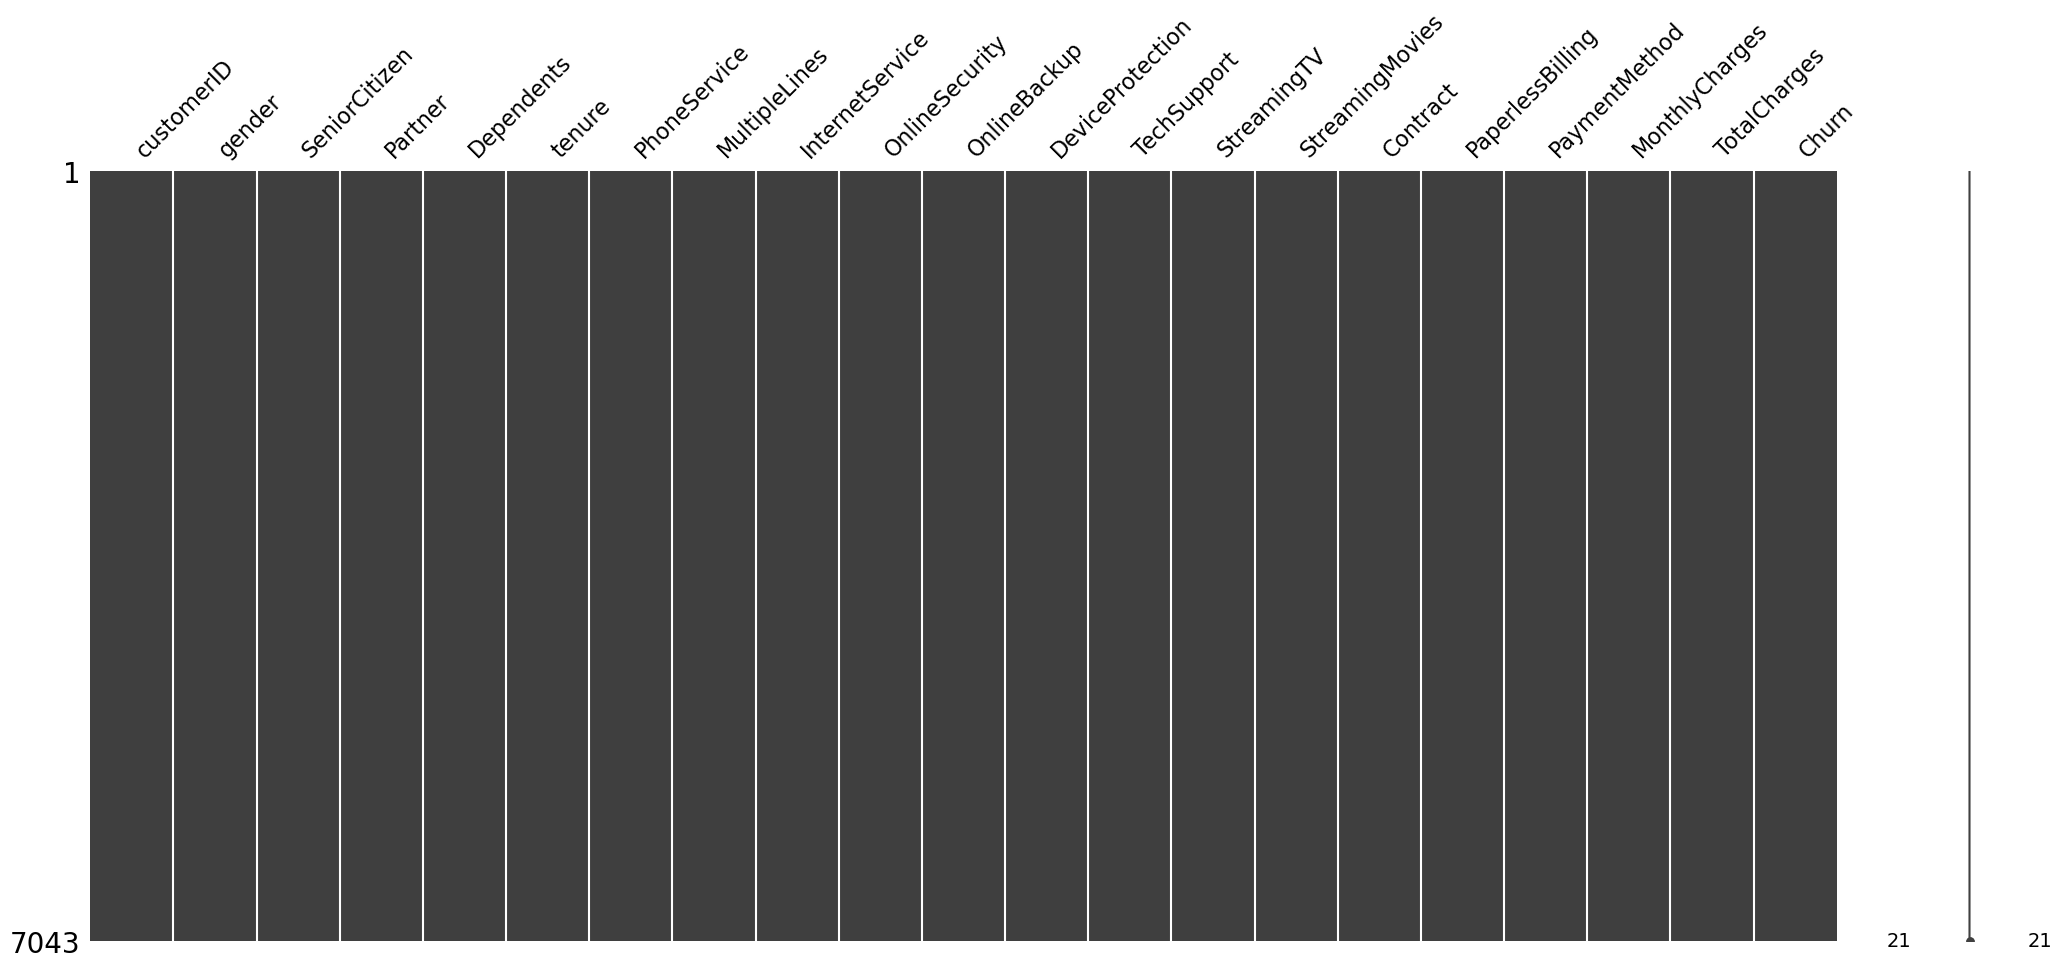

In [13]:
msno.matrix(df)
plt.show()  


In [15]:
print("Number of missing values per column:")
print(df.isnull().sum())


Number of missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [25]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,NaN
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,NaN
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,NaN


In [31]:
df.isnull().sum().sum()

0

In [32]:
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [38]:
print(df['Churn'].value_counts())


No     5174
Yes    1869
Name: Churn, dtype: int64


In [39]:
df.isna().sum()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
# Identify categorical variable columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Print the list of categorical variable columns
print("Categorical variable columns:")
print(categorical_columns)

Categorical variable columns:
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [17]:
# Identify categorical variable columns
categorical_columns = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the encoded DataFrame
print("Encoded DataFrame with one-hot encoding:")
print(df_encoded.head())


Encoded DataFrame with one-hot encoding:
   SeniorCitizen  tenure  MonthlyCharges TotalCharges  customerID_0002-ORFBO  \
0              0       1           29.85        29.85                      0   
1              0      34           56.95       1889.5                      0   
2              0       2           53.85       108.15                      0   
3              0      45           42.30      1840.75                      0   
4              0       2           70.70       151.65                      0   

   customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   customerID_0013-EXCHZ  custome

In [ ]:
#TASK 02 Exploratory data analysis (EDA)

In [44]:
# Convert 'Churn' column to numeric
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Calculate churn rate
total_customers = len(df)
churned_customers = df['Churn'].sum()
churn_rate = (churned_customers / total_customers) * 100  # Convert to percentage

# Print the calculated churn rate and counts
print(f"Total Customers: {total_customers}")
print(f"Churned Customers: {churned_customers}")
print(f"Overall Churn Rate: {churn_rate:.2f}%")


Total Customers: 7043
Churned Customers: 1869
Overall Churn Rate: 26.54%


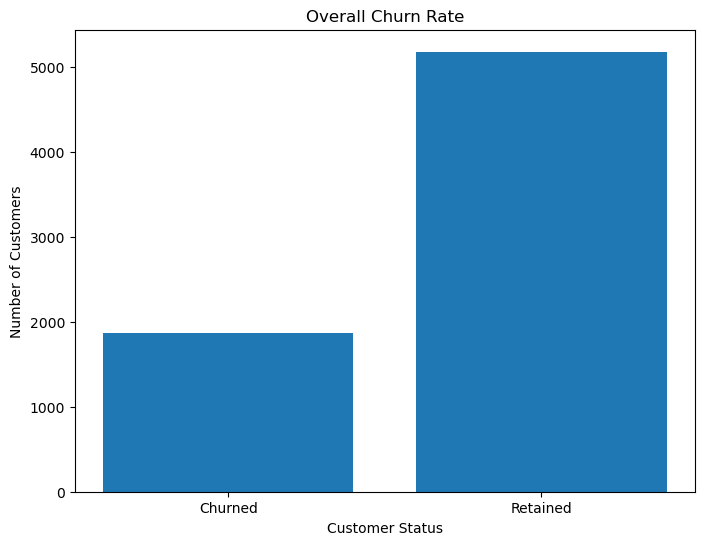

In [46]:
# Visualize churn rate
plt.figure(figsize=(8, 6))
plt.bar(['Churned', 'Retained'], [churned_customers, total_customers - churned_customers])
plt.title('Overall Churn Rate')
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')
plt.show()

In [74]:
# import pandas as pd
# import matplotlib.pyplot as plt

# data = {'customerID': ['001', '002', '003', '004', '005'],
#         'gender': ['Male', 'Female', 'Female', 'Male', 'Male']}
# df = pd.DataFrame(data)

# # Calculate customer distribution by gender
# gender_distribution = df['gender'].value_counts()

# # Visualize customer distribution by gender
# plt.figure(figsize=(6, 6))
# plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
# plt.title('Customer Distribution by Gender')
# plt.show()


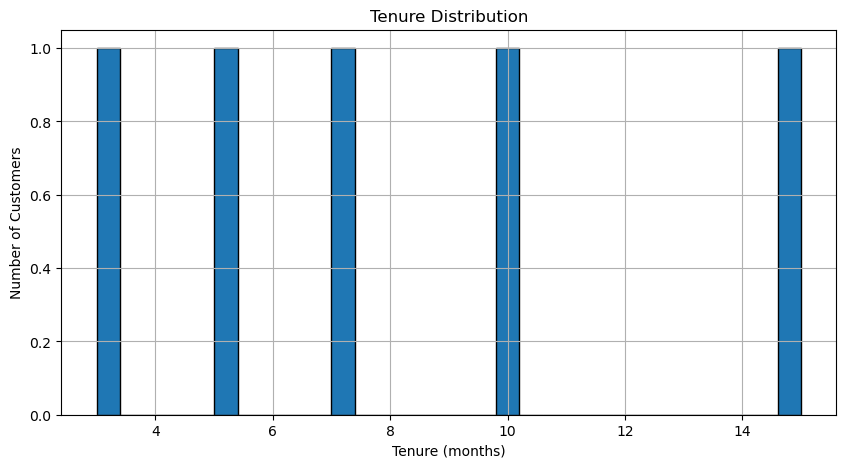

In [75]:
# Analyze tenure distribution
plt.figure(figsize=(10, 5))
plt.hist(df['tenure'], bins=30, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


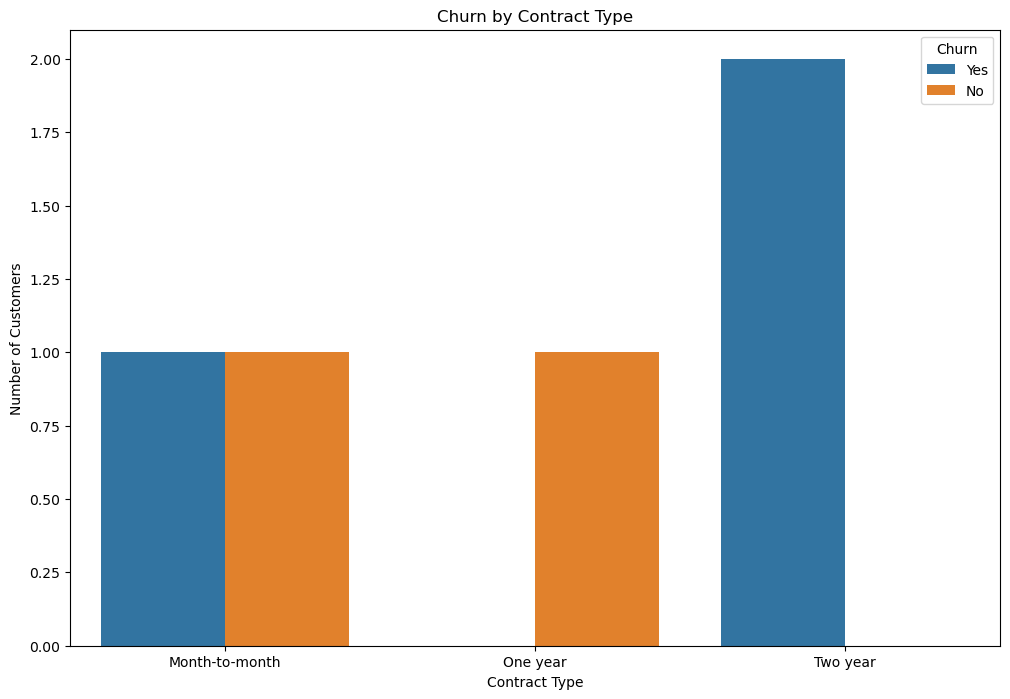

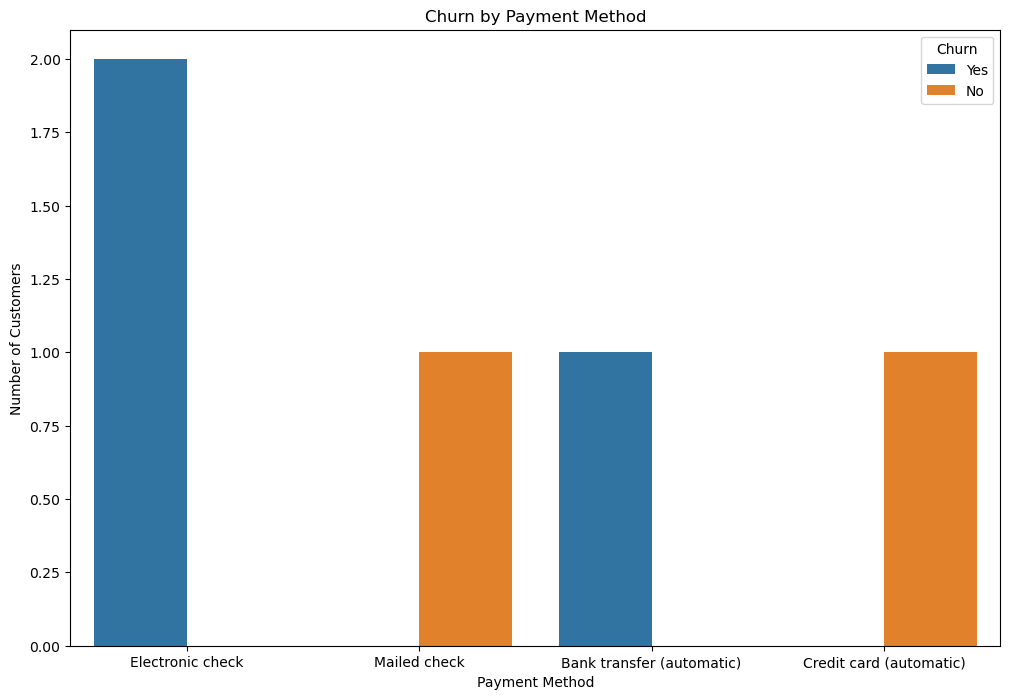

In [79]:
#RELATIONSHIP BETWEEN CHURN AND DIFFERENT CONTRACT TYPES / PAYMENT METHODS
data = {'customerID': ['001', '002', '003', '004', '005'],
        'Contract': ['Month-to-month', 'One year', 'Two year', 'Month-to-month', 'Two year'],
        'PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check'],
        'Churn': ['Yes', 'No', 'Yes', 'No', 'Yes']}
df = pd.DataFrame(data)

# Analyze relationships between churn, contract types, and payment methods
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', loc='upper right')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [ ]:
#TASK 03 customer segmentation

C:\Users\Saranya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Saranya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


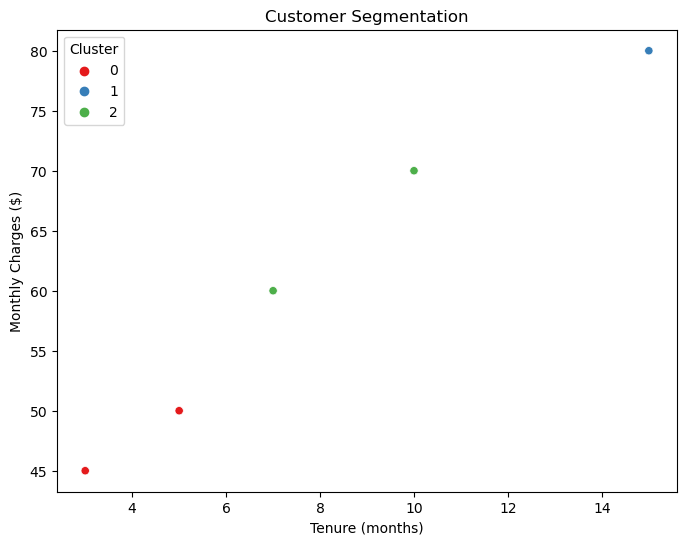

Churn     No  Yes
Cluster          
0        0.5  0.5
1        NaN  1.0
2        0.5  0.5


In [54]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample DataFrame (replace this with your actual DataFrame loading code)
data = {'customerID': ['001', '002', '003', '004', '005'],
        'tenure': [5, 10, 7, 3, 15],  # Sample tenure values in months
        'MonthlyCharges': [50, 70, 60, 45, 80],  # Sample monthly charges in dollars
        'Contract': ['Month-to-month', 'One year', 'Two year', 'Month-to-month', 'Two year'],
        'Churn': ['Yes', 'No', 'Yes', 'No', 'Yes']}
df = pd.DataFrame(data)

# Select features for clustering
X = df[['tenure', 'MonthlyCharges']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Cluster', palette='Set1', legend='full')
plt.title('Customer Segmentation')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.show()

# Analyze churn rates across clusters
cluster_churn_rates = df.groupby('Cluster')['Churn'].value_counts(normalize=True).unstack()
print(cluster_churn_rates)


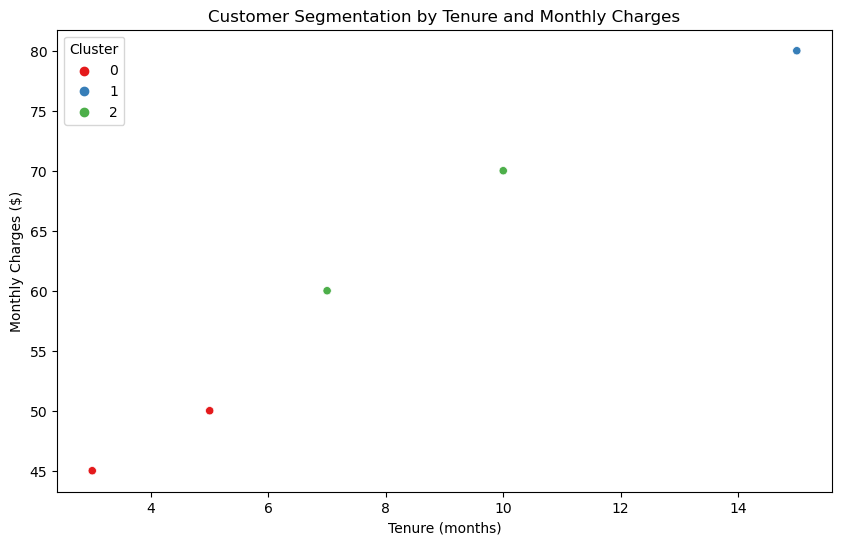

Churn     No  Yes
Cluster          
0        0.5  0.5
1        NaN  1.0
2        0.5  0.5


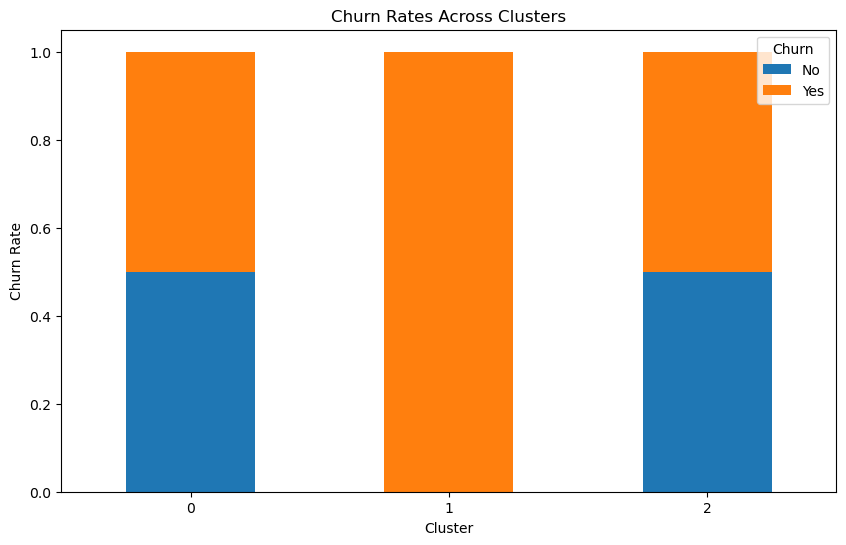

In [55]:
# Explore cluster characteristics
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Cluster', palette='Set1', legend='full')
plt.title('Customer Segmentation by Tenure and Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Cluster')
plt.show()

# Analyze churn rates across clusters
cluster_churn_rates = df.groupby('Cluster')['Churn'].value_counts(normalize=True).unstack()
print(cluster_churn_rates)

# Plot churn rates
cluster_churn_rates.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn Rates Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0)
plt.show()
